# Data Preprocessing 

In [1]:
%reload_ext watermark
%watermark -d -u -v -a 'Duzhe Wang' -p numpy,scipy,matplotlib,sklearn,mlxtend

Duzhe Wang 
last updated: 2020-05-21 

CPython 3.8.1
IPython 7.12.0

numpy 1.18.1
scipy 1.4.1
matplotlib 3.1.3
sklearn 0.22.1
mlxtend 0.17.2


In [2]:
import numpy as np
import pandas as pd

### 0- Loading Tabular Datasets from Text Files

In [3]:
!pwd
!head data/iris.csv

/Users/peterwang/Desktop/datapreprocessing/code
Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [4]:
df = pd.read_csv('data/iris.csv')
df.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(150, 6)

### 1- Basic Data Handling: change the class labels from a string representation into an integer format

- The `apply` method

In [7]:
def ClassLabels(x):
    if x=="Iris-setosa":
        return 0
    elif x=="Iris-versicolor":
        return 1
    else: 
        return 2
    
df['ClassLabels']=df.apply(lambda x: ClassLabels(x['Species']), axis=1)   

df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,ClassLabels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
np.unique(df['ClassLabels'])

array([0, 1, 2])

- The `map` method

In [9]:
d = {'Iris-setosa': 0,
     'Iris-versicolor': 1,
     'Iris-virginica': 2}

df = pd.read_csv('data/iris.csv')
df['ClassLabels'] = df['Species'].map(d)
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,ClassLabels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [10]:
np.unique(df['ClassLabels'])

array([0, 1, 2])

### 2- Make `X` and `y` in machine learning models

In [11]:
y = df['ClassLabels'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
y.shape

(150,)

In [13]:
X = df.iloc[:, 1:5].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
X.shape

(150, 4)

### 3- Exploratory Data Analysis

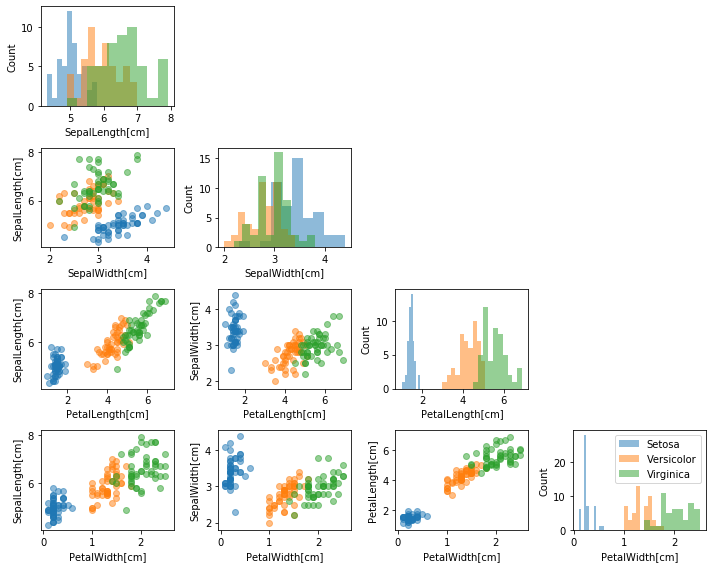

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.plotting import scatterplotmatrix


names = df.columns[1:5]

fig, axes = scatterplotmatrix(X[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==2], fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=['Setosa', 'Versicolor', 'Virginica'])
plt.savefig('eda.pdf')
plt.show()

## 4- Splitting a Dataset into Train, Validation, and Test Subsets

- One important step, prior to splitting a dataset, is shuffling it, otherwise, we may end up with unrepresentative class distributions if the dataset was sorted prior to splitting.

In [19]:
indices = np.arange(X.shape[0])
rng = np.random.RandomState(123)
permuted_indices = rng.permutation(indices)  # shuffle
permuted_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [20]:
train_size, valid_size = int(0.65*X.shape[0]), int(0.15*X.shape[0])
test_size = X.shape[0] - (train_size + valid_size)
print(train_size, valid_size, test_size)

97 22 31


In [21]:
train_ind = permuted_indices[:train_size]
valid_ind = permuted_indices[train_size:(train_size + valid_size)]
test_ind = permuted_indices[(train_size + valid_size):]

In [22]:
X_train, y_train = X[train_ind], y[train_ind]
X_valid, y_valid = X[valid_ind], y[valid_ind]
X_test, y_test = X[test_ind], y[test_ind]

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(97, 4)
(97,)
(22, 4)
(22,)


## Stratification

- Previously, we wrote our own code to shuffle and split a dataset into training, validation, and test subsets, which had one considerable downside.
- If we are working with small datasets and split it randomly into subsets, it will affect the class distribution in the samples -- this is problematic since machine learning algorithms/models assume that training, validation, and test samples have been drawn from the same distributions to produce reliable models and estimates of the generalization performance.
- The method of ensuring that the class label proportions are the same in each subset after splitting is usually referred to as "stratification."
- Stratification is supported in scikit-learn's `train_test_split` method if we pass the class label array to the `stratify` parameter as shown below.




In [23]:
from sklearn.model_selection import train_test_split

# split the whole dataset into two parts
X_temp, X_test, y_temp, y_test = \
        train_test_split(X, y, test_size=0.2, 
                         shuffle=True, random_state=123, stratify=y)

print(np.bincount(y_temp))
print(np.bincount(y_test))


[40 40 40]
[10 10 10]


In [24]:
X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp, y_temp, test_size=0.2,
                         shuffle=True, random_state=123, stratify=y_temp)

print('Train size', X_train.shape, 'class proportions', np.bincount(y_train))
print('Valid size', X_valid.shape, 'class proportions', np.bincount(y_valid))
print('Test size', X_test.shape, 'class proportions', np.bincount(y_test))

Train size (96, 4) class proportions [32 32 32]
Valid size (24, 4) class proportions [8 8 8]
Test size (30, 4) class proportions [10 10 10]


## 5- Data Scaling

- Whether or not to scale features depends on the problem at hand and requires your judgement.
- However, there are several algorithms (especially gradient-descent), which work much better (are more robust, numerically stable, and converge faster) if the data is centered and has a smaller range.
- There are many different ways for scaling features; here, we only cover to of the most common "normalization" schemes: min-max scaling and z-score standardization.

### Min-max scaling

- Min-max scaling squashes the features into a [0, 1] range, which can be achieved via the following equation for a single input $i$:

$$x^{[i]}_{\text{norm}} = \frac{x^{[i]} - x_{\text{min}} }{ x_{\text{max}} - x_{\text{min}} }$$

- Below is an example of how we can implement and apply min-max scaling on 6 data instances given a 1D input vector (1 feature) via NumPy.

In [25]:
x = np.arange(6).astype(float)
x

array([0., 1., 2., 3., 4., 5.])

In [26]:
x_norm = (x - x.min()) / (x.max() - x.min())
x_norm

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

### Standardization

- The formula for standardizing a feature is shown below, for a single data point $x^{[i]}$.

$$x^{[i]}_{\text{std}} = \frac{x^{[i]} - \mu_x }{ \sigma_{x} }$$

In [27]:
x = np.arange(6).astype(float)
x

array([0., 1., 2., 3., 4., 5.])

In [28]:
x_std = (x - x.mean()) / x.std()
x_std

array([-1.46385011, -0.87831007, -0.29277002,  0.29277002,  0.87831007,
        1.46385011])

- Conveniently, NumPy and Pandas both implement a `std` method, which computes the standard devation.
- Note the different results shown below.

In [29]:
df = pd.DataFrame([1, 2, 1, 2, 3, 4])
print(df)
df[0].std()

   0
0  1
1  2
2  1
3  2
4  3
5  4


1.1690451944500122

In [30]:
df[0].values.std()

1.0671873729054748

- The results differ because Pandas computes the "sample" standard deviation ($s_x$), whereas NumPy computes the "population" standard deviation ($\sigma_x$).

$$s_x = \sqrt{ \frac{1}{n-1} \sum^{n}_{i=1} (x^{[i]} - \bar{x})^2 }$$

$$\sigma_x = \sqrt{ \frac{1}{n} \sum^{n}_{i=1} (x^{[i]} - \mu_x)^2 }$$

- In the context of machine learning, since we are typically working with large datasets, we typically don't care about Bessel's correction (subtracting one degree of freedom in the denominator).
- Further, the goal here is not to model a particular distribution or estimate distribution parameters accurately; however, if you like, you can remove the extra degree of freedom via NumPy's `ddof` parameters -- it's not necessary in practice though.

In [31]:
df[0].values.std(ddof=1)

1.1690451944500122

<font color=blue>
Comments: 
    
- **Standardization across instances should be done after splitting the data between training and test set, using only the data from the training set.** This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.

- In particular, it is important that we **re-use the parameters estimated from the training set to transfrom validation and test sets**.
</font>    

In [32]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std = (X_train - mu) / sigma
X_valid_std = (X_valid - mu) / sigma
X_test_std = (X_test - mu) / sigma

### Scikit-Learn Transformer API

- Typical examples of transformers in scikit-learn are the `MinMaxScaler` and the `StandardScaler`, which can be used to perform min-max scaling and z-score standardization as discussed earlier.

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)


In [34]:
# min-max scaling
MinMaxscaler=MinMaxScaler()
MinMaxscaler.fit(X_train)
X_train_minmax=MinMaxscaler.transform(X_train)
X_valid_minmax=MinMaxscaler.transform(X_valid)
X_test_minmax=MinMaxscaler.transform(X_test)

## 6- Categorical Data

- When we preprocess a dataset as input to a machine learning algorithm, we have to be careful how we treat categorical variables.
- There are two broad categories of categorical variables: nominal (no order implied) and ordinal (order implied).

In [35]:
df = pd.read_csv('data/categoricaldata.csv')
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XXL,15.3,class1


- In the example above, 'size' would be an example of an ordinal variable; i.e., if the letters refer to T-shirt sizes, it would make sense to come up with an ordering like M < L < XXL.
- Hence, we can assign increasing values to a ordinal values; however, the range and difference between categories depends on our domain knowledge and judgement.
- To convert ordinal variables into a proper representation for numerical computations via machine learning algorithms, we can use the now familiar `map` method in Pandas, as shown below.

In [36]:
mapping_dict = {'M': 2,
                'L': 3,
                'XXL': 5}

df['size'] = df['size'].map(mapping_dict)
df

,color,size,price,classlabel
0,green,2,10.1,class1
1,red,3,13.5,class2
2,blue,5,15.3,class1


- Machine learning algorithms do not assume an ordering in the case of class labels.
- Here, we can use the `LabelEncoder` from scikit-learn to convert class labels to integers as an alternative to using the `map` method

In [37]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['classlabel'] = le.fit_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,2,10.1,0
1,red,3,13.5,1
2,blue,5,15.3,0


- Representing nominal variables properly is a bit more tricky.
- Since machine learning algorithms usually assume an order if a variable takes on integer values, we need to apply a "trick" here such that the algorithm would not make this assumption.
- this "trick" is also called "one-hot" encoding -- we binarize a nominal variable, as shown below for the color variable (again, we do this because some ordering like orange < red < blue would not make sense in many applications).

In [38]:
pd.get_dummies(df)

,size,price,classlabel,color_blue,color_green,color_red
0,2,10.1,0,0,1,0
1,3,13.5,1,0,0,1
2,5,15.3,0,1,0,0


- Note that executing the code above produced 3 new variables for "color," each of which takes on binary values.
- However, there is some redundancy now (e.g., if we know the values for `color_green` and `color_red`, we automatically know the value for `color_blue`).
- We can do this conveniently by dropping e.g., one of the columns of the one-hot encoded variable.

In [39]:
pd.get_dummies(df, drop_first=True)

,size,price,classlabel,color_green,color_red
0,2,10.1,0,1,0
1,3,13.5,1,0,1
2,5,15.3,0,0,0


## 7- Missing Data

- There are many different ways for dealing with missing data.
- The simplest approaches are removing entire columns or rows.
- Another simple approach is to impute missing values via the feature means, medians, mode, etc.
- There is no rule or best practice, and the choice of the approprite missing data imputation method depends on your judgement and domain knowledge.
- Below are some examples for dealing with missing data.

In [40]:
df = pd.read_csv('data/missingdata.csv')
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [41]:
# missing values per column:
df.isnull().sum(axis=0)

A    0
B    0
C    1
D    1
dtype: int64

In [42]:
# drop rows with missing values:

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [43]:
# drop columns with missing values:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [44]:
# impute missing values 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = df.values
X = imputer.fit_transform(df.values)  # impute mean values (column-wise)
X

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## Further Resources

- Scikit-learn documentation: http://scikit-learn.org/stable/documentation.html

- http://pages.stat.wisc.edu/~sraschka/teaching/stat479-fs2019/



## Appendix: lambda function

In [45]:
def f(x):
    print("Hello world"+str(x))
  
f(123)

Hello world123


In [46]:
f=lambda x: print("Hello world"+str(x))
f(123)

Hello world123


In [47]:
data=pd.DataFrame({"class":['positive', 'negative', 'positive', 'positive', 'negative']})
print(data)
data['label']=data["class"].apply(lambda x: 1 if x=="positive" else -1)
print(data)


      class
0  positive
1  negative
2  positive
3  positive
4  negative
      class  label
0  positive      1
1  negative     -1
2  positive      1
3  positive      1
4  negative     -1
